# Sythesizers produced between __1896-2024__: Analysis of the market impact.

### The dataset contains this elements: 


__Year__: The year the synthesizer was released.


__Brand__: The manufacturer or brand name of the synthesizer.


__Name__: The model name of the synthesizer.


__Device__: The type of device (e.g., synthesizer, sampler).


__Form Factor__: The form of the device, such as rack-mounted or keyboard.


__Architecture__: The design of the synthesizer, such as analog or digital.


__Synthesis__: The synthesis engine used (e.g., subtractive, FM).


__Synthesis Details__: Specific details about the synthesis engine.


__Polyphony__: The number of notes that can be played simultaneously.


__Oscillators__: The number of oscillators available in the synthesizer.


__Multitimbral__: Indicates if the synthesizer is Multitimbral.


__Keys__: The number of keys on the synthesizer.


__MIDI__: Indicates if the synthesizer is MIDI capable.


__Memory__: Indicates if the synthesizer has memory.


__Key Type__: The type of keys (e.g., Keys, Pads).


__Velocity__: Indicates if the synthesizer responds to key velocity.


__Aftertouch__: Indicates the presence of aftertouch functionality.


__Produced__: The years during which the synthesizer was in production.


__Duration__: The length of time the synthesizer was produced.


__Fame__: A qualitative measure of the synthesizer's popularity or influence.


In [1]:


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/synthesizers-1896-2024/synthesizers_1896_2024.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


## **Loading and exploring the data**
 

In [3]:
df= pd.read_csv("/kaggle/input/synthesizers-1896-2024/synthesizers_1896_2024.csv", index_col= 0)

In [4]:
df.head()

,Year,Brand,Name,Device,Form Factor,Architecture,Synthesis,Synthesis Details,Polyphony,Oscillators,Multitimbral,Keys,MIDI,Memory,Key type,Velocity,Aftertouch,Produced,Duration,Fame
0,1896,Thaddeus Cahill,Thaddeus Cahill - Telharmonium,Synth,Keys,Analog,Analog,Electromagnetic,84,408,0,153,False,False,Keys,False,False,1896 - 1914,18,0.182024
1,1905,Max Kohl AG,Max Kohl Ag - Helmholtz Sound Synthesiser,Synth,Desktop,Analog,Analog,Acoustic resonators,10,10,0,0,False,False,Keys,False,False,1905 - 1905,0,0.087696
2,1928,Lev Sergeyevich Termen,Lev Sergeyevich Termen - Theremin,Synth,Desktop,Analog,Analog,VCO,1,3,1,0,False,False,NaN,False,False,1928 - 1928,0,0.111132
3,1928,Maurice Martenot,Maurice Martenot - Ondes Martenot,Synth,Keys,Analog,Analog,VCO,1,1,0,72 / 84,False,False,Keys,False,False,1928 - 1988,60,0.237428
4,1930,Friedrich Trautwein,Friedrich Trautwein - Trautonium,Synth,Desktop,Analog,Analog,VCO,1,1,0,0,False,False,Wire,False,False,1930 - 1935,5,0.132743


In [5]:
df.nunique() #We can recognize from here which columns are categorical

Year                   80
Brand                 346
Name                 2368
Device                  5
Form Factor            25
Architecture            4
Synthesis              37
Synthesis Details     165
Polyphony              69
Oscillators            37
Multitimbral           18
Keys                   52
MIDI                    2
Memory                  2
Key type               59
Velocity                2
Aftertouch              4
Produced              391
Duration               25
Fame                 2368
dtype: int64

In [6]:
df.shape

(2368, 20)

In [7]:
df.columns

Index(['Year', 'Brand', 'Name', 'Device', 'Form Factor', 'Architecture',
       'Synthesis', 'Synthesis Details', 'Polyphony', 'Oscillators',
       'Multitimbral', 'Keys', 'MIDI', 'Memory', 'Key type', 'Velocity',
       'Aftertouch', 'Produced', 'Duration', 'Fame'],
      dtype='object')

In [8]:
#Cleaning
df.isna().sum()
df.dropna() #with all was not changing
df.drop_duplicates()

,Year,Brand,Name,Device,Form Factor,Architecture,Synthesis,Synthesis Details,Polyphony,Oscillators,Multitimbral,Keys,MIDI,Memory,Key type,Velocity,Aftertouch,Produced,Duration,Fame
0,1896,Thaddeus Cahill,Thaddeus Cahill - Telharmonium,Synth,Keys,Analog,Analog,Electromagnetic,84,408,0,153,False,False,Keys,False,False,1896 - 1914,18,0.182024
1,1905,Max Kohl AG,Max Kohl Ag - Helmholtz Sound Synthesiser,Synth,Desktop,Analog,Analog,Acoustic resonators,10,10,0,0,False,False,Keys,False,False,1905 - 1905,0,0.087696
2,1928,Lev Sergeyevich Termen,Lev Sergeyevich Termen - Theremin,Synth,Desktop,Analog,Analog,VCO,1,3,1,0,False,False,NaN,False,False,1928 - 1928,0,0.111132
3,1928,Maurice Martenot,Maurice Martenot - Ondes Martenot,Synth,Keys,Analog,Analog,VCO,1,1,0,72 / 84,False,False,Keys,False,False,1928 - 1988,60,0.237428
4,1930,Friedrich Trautwein,Friedrich Trautwein - Trautonium,Synth,Desktop,Analog,Analog,VCO,1,1,0,0,False,False,Wire,False,False,1930 - 1935,5,0.132743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,2024,Udo,Udo Audio Super 8 White,Synth,Keys,Hybrid,Digital-Analog Hybrid,Hybrid,16,2,0,61,True,True,NaN,True,True,2024 - Present,0,0.186209
2364,2024,Supercritical,Supercritical Synthesizers Redshift 6,Synth,Desktop,Analog,Analog,VCO,6,0,0,0,True,True,NaN,False,NaN,2024 - Present,0,0.119187
2365,2024,Duebreq,Duebreq Stylophone Theremin,Synth,Desktop,Analog,Analog,VCO,1,0,0,0,True,True,NaN,False,False,2024 - Present,0,0.068938
2366,2024,Arturia,Arturia Polybrute 12,Synth,Keys,Analog,Analog,VCO,12,1,0,61,True,True,NaN,True,True,2024 - Present,0,0.193472


In [9]:
df = df.copy()

## **1. Releases per year**



#### Analyzing this dataframe, let's see how's the tendency of releases per decades. We're going to take in consideration those years where we can find 20 or more releases. 

In [10]:
df_filtered= df['Year'].value_counts().sort_index()

df_release = df_filtered[df_filtered>20] #filtered by years which has more than 20 releases


In [11]:
#For color bars
def get_color(year):
    if year < 1970:
        return '#f23d50'
    elif year < 1980:
        return '#f4efcc'
    elif year < 1990:
        return '#00365c'
    elif year < 2000:
        return '#1c8097'
    elif year < 2010:
        return '#91b2b1'
    elif year <2020:
        return "#dadedf"
    else:
        return '#a2596f'


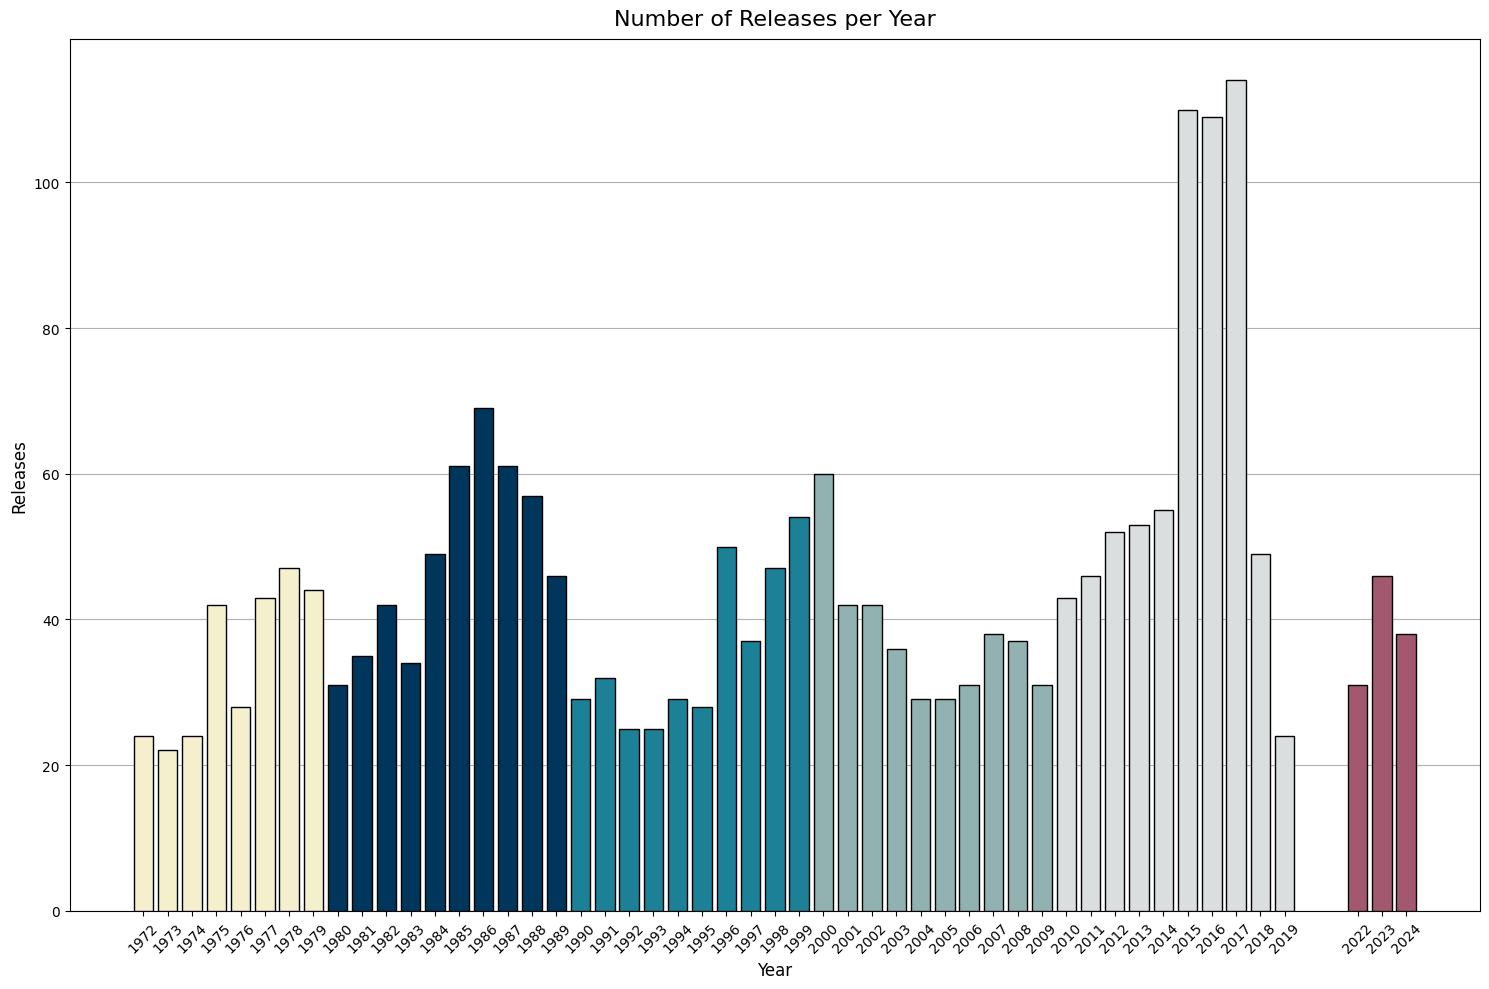

In [12]:
# Get colors for the bars
colors = [get_color(year) for year in df_release.index]

# Set font
plt.rcParams['font.family'] = 'Avenir'

# Create the figure and axis
plt.figure(figsize=(15, 10))
ax = plt.gca()
ax.set_facecolor('white') # Background color

# Bar plot
plt.grid(axis='y', zorder=0) # Ensure grid is behind bars

# Create the bar plot with black edges
bars = plt.bar(df_release.index, df_release.values, color=colors, edgecolor='black', zorder=3)

# Set x-ticks to be the unique years in the data
plt.xticks(ticks=df_release.index, labels=df_release.index, rotation=45)

plt.title('Number of Releases per Year', fontsize=16, pad=10)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Releases', fontsize=12)
plt.tight_layout()
plt.show()


!!! 
Analysis left

## **2. Architecture releases by Year**

#### Let's focus on the number of releases according to the type of architecture of the sythesizers.

In [13]:
df["Architecture"].unique()

array(['Analog', 'Miscellaneous', 'Hybrid', 'Digital'], dtype=object)

#### So far we see that we have 4 types of architectures related to synthesizers:
* Analog
* Miscellaneous
* Hybrid
* Digital


In [14]:
#We're going to use this count df when we want to use this combination without filters. Count of type of Architecture realeases per year.

count= df.groupby("Architecture")["Year"].value_counts().reset_index(name='counts')

#### We're going to filter also by years which has more than 20 releases, we want to see with this what's the tendency by type of production. 


In [15]:
df_arch_release = count[count["counts"]>20] 

<Figure size 1500x1000 with 0 Axes>

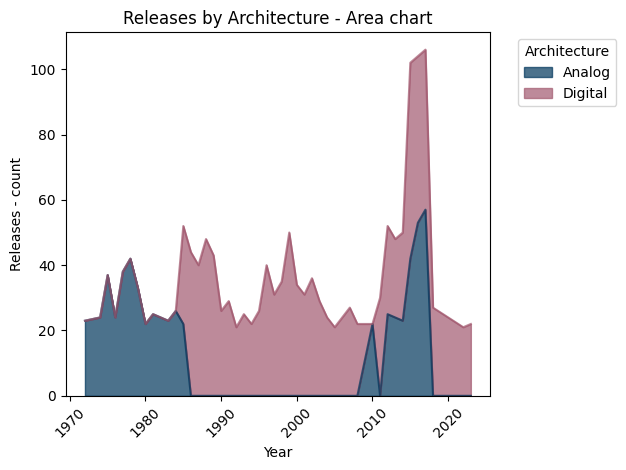

In [16]:

df_pivot = df_arch_release.pivot_table(index='Year', columns='Architecture', values='counts', fill_value=0) #for plotting


plt.figure(figsize=(15, 10))
df_pivot.plot(kind='area', stacked=True, color=["#00365c", "#a2596f"], alpha=0.7)

plt.title('Releases by Architecture - Area chart')
plt.xlabel('Year')
plt.ylabel('Releases - count')
plt.xticks(rotation=45)
plt.legend(title='Architecture', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


#### We can observe with this graphic that the tendency is focus in two diferent types of architechture: Analog and Digital, having this last type a clear difference amounts of productions per year.

#### Let's review the rest of types without filtered of architectures for a better comparition:

In [17]:
count.groupby("Architecture")["counts"].agg("mean").reset_index().sort_values(by="counts", ascending= False)

,Architecture,counts
1,Digital,25.061224
0,Analog,12.151899
3,Miscellaneous,3.216216
2,Hybrid,2.178571


#### We can see here that the average of releases based on their architecture is concentrate in Digital and Analog sythesizers throught the years. We're not going to take in consideration Hybrid or Miscellaneous since their mean is not representative. 

## **3. Brand releases by Year**


In [18]:
brand_yearly_releasest10 = df.groupby(['Brand', 'Year']).size().reset_index(name='counts').sort_values(by="counts", ascending= False).head(20)

In [19]:
brand_yearly_releasest10.to_csv("/kaggle/working/brand-year-release.csv", index=False, encoding='utf-8')
brand_yearly_releasest10

,Brand,Year,counts
882,Roland,1986,14
911,Roland,2015,13
566,Korg,2015,12
563,Korg,2012,12
913,Roland,2017,12
564,Korg,2013,12
880,Roland,1984,11
579,Kurzweil,1988,10
1149,Yamaha,1988,10
567,Korg,2016,10


#### We use this df brand_yearly_releasest10 to plot in Tableau the amount of releases by brand per year, filtered of their top 10. 

#### At this graphic, we can remark top release like the Roland did in 1986 or 2015, giving us an idea of how much this brand is representative on the market during the 80s and nowadays. 

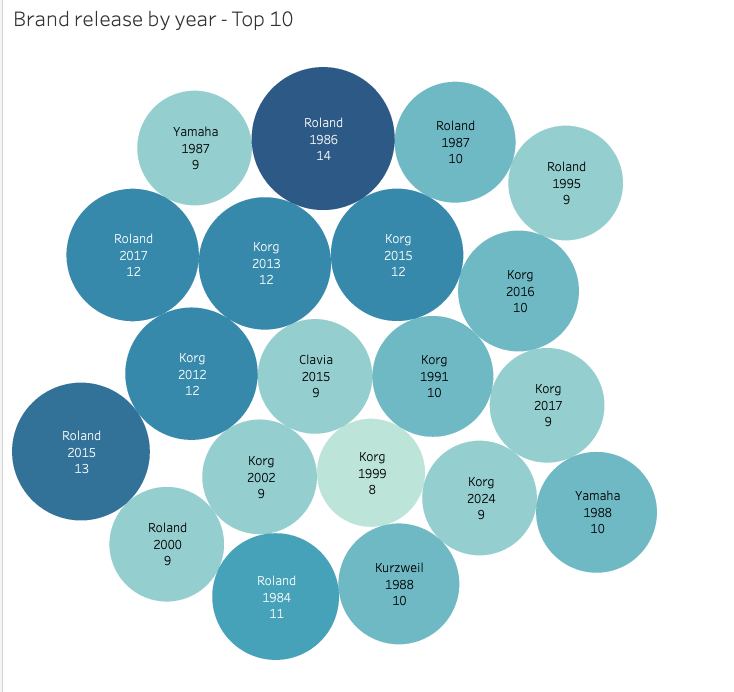)
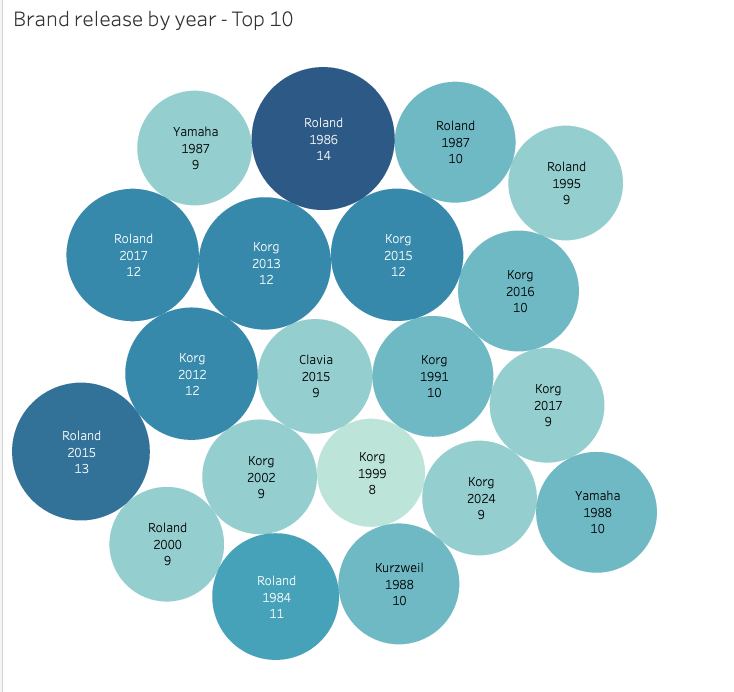

## **4. Influence on the market - Number of sythesizers produced by brand**

In [20]:
top_10_production= df.Brand.value_counts().reset_index().head(15)
top_10_production

,Brand,count
0,Roland,263
1,Korg,256
2,Yamaha,169
3,E-mu,69
4,Kurzweil,67
5,Clavia,63
6,Moog,62
7,Akai,50
8,Ensoniq,37
9,Oberheim,37


#### We extract this df top_10_production so we can work with Tableau for the visualization. 

In [21]:
top_10_production.to_csv("/kaggle/working/top_10_production.csv", index=False, encoding='utf-8')


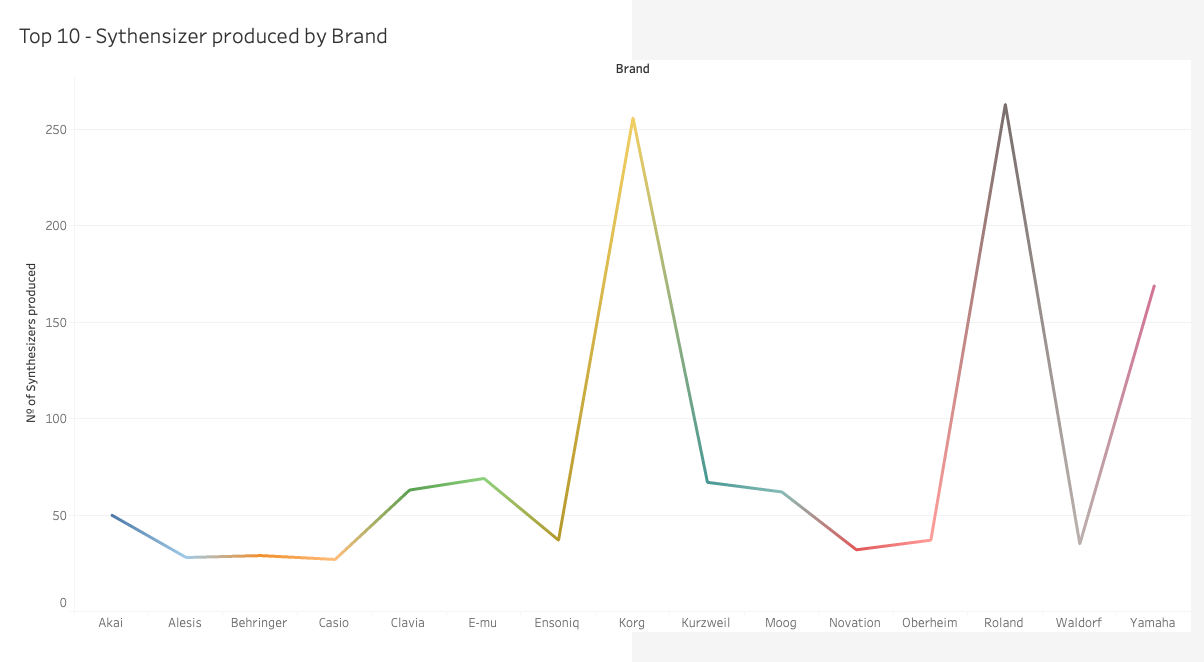

####   As we expected, we can visualize how's the influence of certain brands on the market. The presence of brands like __Korg, Roland or Yamaha__ on the production of synthesizers is something to take in consideration in comparition with other brands.

## 5. Name, Brand, Fame

In [22]:
df_fame= df[["Brand", "Name","Produced","Fame"]]

In [23]:
fame= df_fame.sort_values(by="Fame", ascending = False)

In [24]:
rated_by_fame= fame[fame["Fame"] > 0.75]

In [25]:
rated_by_fame.dtypes

Brand        object
Name         object
Produced     object
Fame        float64
dtype: object

In [26]:
rated_by_fame.to_csv("/kaggle/working/rated_by_fame.csv")

### Using this df rated_by_fame so we can observe the total amount of points of Fame for each brand

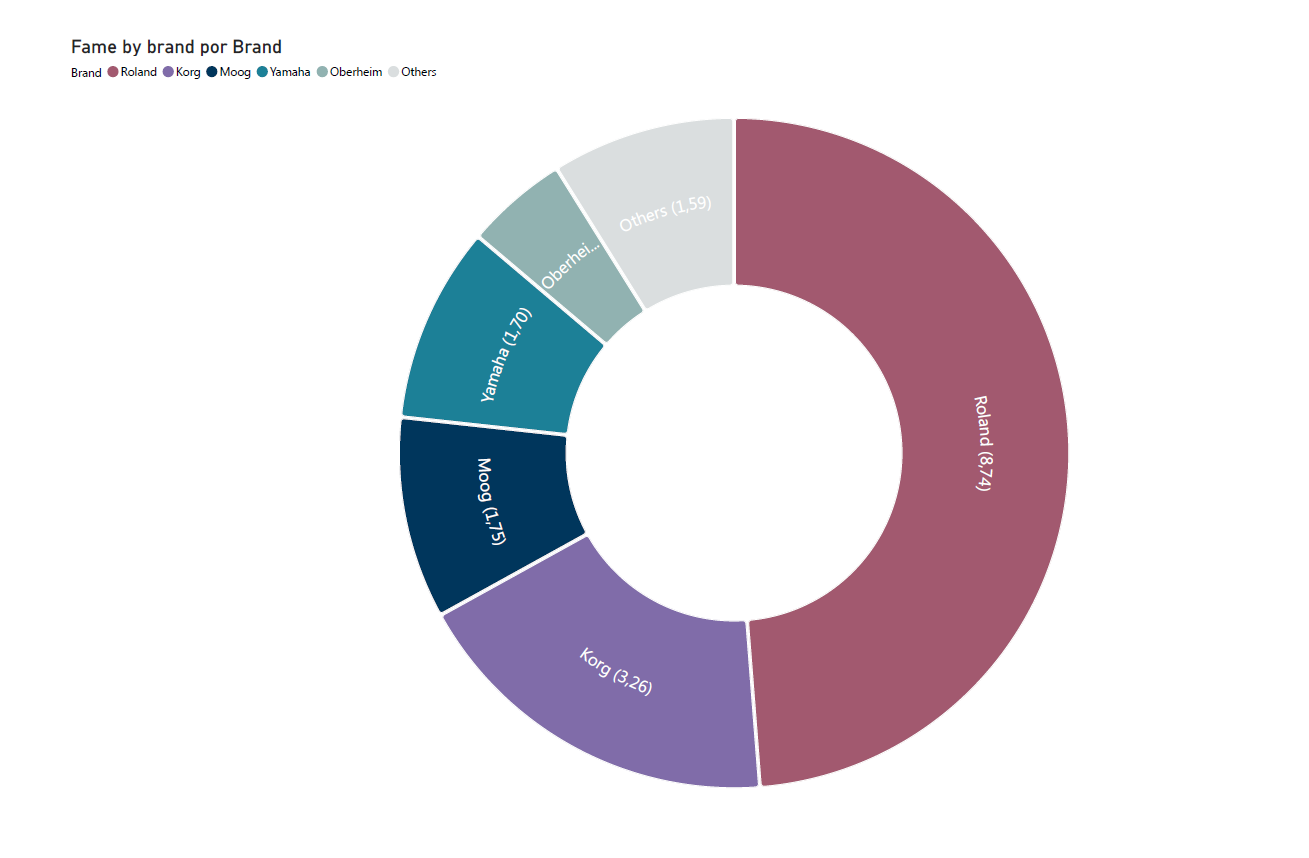

In [27]:
#top_10_fame= df.groupby(["Brand", "Architecture", "Year"])["Fame"].mean().reset_index().sort_values(by="Fame", ascending=False).head(15)                                                                                                       